# Tests d'hypothèses




## Travail en séance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import erf
from scipy.stats import chi, chi2, chisquare, chi2_contingency

### Adéquation à une loi normale

In [ ]:
data=np.array([5.5,3,13.7,13,18,11.9,9.4,10.5,15.9,9.8,8.4,8.7,18,12.7,9.4,
      14.4,7.3,9.3,7.7,8.4,11.2,5.5,8,11.6,6.2,5.2,18.7,9.1,13.7,
      9.1,8.4,9.4,6.9,8.7,11.2,8.7,5.9,8.7,9.8,19.6,9.6,14.1,9.1,13.7,
      6.9,8.7,7.3,9.6,13,13.5,15.2,15.7,14.4,8,9.4,6.6,10.9,8.4,9.8,18,
      10,18,19.3,4.1,9.8,17.3,13.7,11.6,6.6,6.9,11.9,19.9,9.8,8.4,15.2,
      11.4,7.7,11.9,12.3,12.7,19.9,8,11.9,13,14.3,14.4,16.6,14.1,9.4,13.7,
      12.7,9.8,8.4,7.7,11,6.9,4.4,10.3,18.4,8.5,11.2,13,19.9,10.7,8,13.7,
      19.8,10.5,13.7,3.4,5.9,4.3,8.7,10.9,11.2,9.8,9.8,10.3,6.6,12.3,7.7,
      10.5,11.6,8.7,8,7.7,4.4,11.6,8,9.6,9.1,12.1,10.2,13.7,12.7,13,12.3,
      8.4,7.3,9.6,8,9.8,7.3,14.8,7.7,9.4,13.2,9.8,13,8.7,16.9,12.3,8.7,11.6,
      8.4,5.2,19.9,12.1,8,9.3,13.7,6.6,13.4,5.5,8.7,6.6,12.3,12.7,10.9,7.3,
      8.4,19.9,8.7,9.4,16.9,18.4,11.8,7.7,8,6.2,15.2,11.9,11.6,7.7,11.2,9.1,
      9.8,13.4,11.2,19.9,6.8,8.2,18.4,14.4,10.9,9.8,17.3,14.3,8,13,19.9,19.9,
      19.9,19.14,18.55,18.55,18.42,18.29,18.22,18.16,17.83,17.63,17.63,17.37,
      17.24,16.84,16.32,16.18,16.18,16.18,16.05,15.92,15.92,15.79,15.79,15.66,
      15.66,15.66,15.66,15.66,15.53,15.53,15.39,15.39,15.39,15.39,15.26,15.13,
      15.13,15,15,15,15,14.93,14.87,14.74,14.74,14.61,14.61,14.61,14.61,14.34,
      14.21,14.21,14.08,14.08,14.08,14.08,14.08,13.95,13.82,13.82,13.82,13.68,
      13.62,13.55,13.42,13.42,13.42,13.29,13.16,13.16,13.16,12.89,12.89,12.89,
      12.89,12.89,12.89,12.76,12.76,12.76,12.76,12.63,12.5,12.5,12.5,12.5,12.43,
      12.37,12.37,12.37,12.24,12.24,12.24,12.24,12.24,12.24,12.11,12.11,12.11,
      12.11,11.97,11.97,11.84,11.84,11.84,11.84,11.84,11.58,11.58,11.58,11.58,
      11.58,11.45,11.45,11.25,11.25,11.25,11.18,11.18,11.05,11.05,10.92,10.92,
      10.83,10.79,10.79,10.66,10.66,10.66,10.66,10.53,10.53,10.53,10.53,10.53,
      10.39,10.39,10.39,10.26,10.26,10.26,10.26,10.26,10.13,10.13,10,10,10,10,
      10,10,9.87,9.84,9.74,9.74,9.74,9.74,9.67,9.61,9.61,9.61,9.41,9.34,9.34,
      9.34,9.28,9.21,9.21,9.08,8.95,8.95,8.82,8.82,8.82,8.68,8.55,8.42,8.29,
      8.29,8.16,8.03,7.89,7.89,7.63,7.63,7.5,7.43,7.24,7.11,6.97,6.97,6.84,
      6.84,6.84,6.84,6.71,6.71,6.58,6.45,6.32,6.18,5.66,5.39,5.39,5.26,5.26,5.13,
      4.61,4.61,4.47,2.63,11.45,13.16,11.05])

### Question 1 : Donner une estimation de la moyenne "muEstim", de la variance "varEstim" de la loi suivie par les $X_i$.

In [ ]:
muEstim = np.mean(data)
varEstim = np.var(data, ddof=1) # un degré de liberté (ddof=1) pour obtenir une estimation non biaisée de la variance sur un échantillon
print(f"Moyenne estimé: {muEstim}")
print(f"Variance estimé: {varEstim}")

Moyenne estimé: 11.37923076923077
Variance estimé: 13.046562298424469


### Question 2 : Les valeurs numériques "muEstim" et "varEstim" sont-elles cohérentes avec la question 2B de la préparation ?

Oui, les valeurs numériques sont cohérentes avec les estimations du maximum de vraisemblance obtenues dans la question 2B.

### Question 3 : Créer une fonction "skewnessEmp" et une fonction "kurtosisEmp" permettant de calculer respectivement les estimateurs empiriques du coefficient d'asymétrie et du kurtosis pour une liste de données $X$ en entrée. Générer une estimation "skewnessEstim" et une estimation "kurtosisEstim" de ces deux coefficients pour la liste "data". Comparer les valeurs théoriques du kurtosis et du coefficient d'asymétrie trouvées à la première question de la préparation.

In [ ]:
def skewnessEmp(X):
    n = len(X)
    mean = np.mean(X)
    std = np.std(X, ddof=1)
    skewness = (n / ((n - 1) * (n - 2))) * np.sum((X - mean)**3) / (std**3)
    return skewness
def kurtosisEmp(X):
    n = len(X)
    mean = np.mean(X)
    std = np.std(X, ddof=1)
    kurtosis = (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3)) * np.sum((X - mean)**4) / (std**4) - 3 * (n - 1)**2 / ((n - 2) * (n - 3))
    return kurtosis
skewnessEstim = skewnessEmp(data)
kurtosisEstim = kurtosisEmp(data)
print(f"Skewness estimé: {skewnessEstim}")
print(f"Kurtosis estimé: {kurtosisEstim}")

Skewness estimé: 0.3044969828641765
Kurtosis estimé: -0.2669344589017997


skewessEstim va donc nous informer sur l'asymétrie de notre échantillon de donnée. Cette valeur de environ 0.3 nous apprend que notre série de donné est assymétrique à droite donc qu'il y'a plus de valeurs extrêmes à droite que à gauche(par rapport à la moyenne).
 kurtosissEmp nous informe sur l'aplatissement de notre distribution. Plus concrêtement il s'interesse à la concentration des données autour de la moyenne.Ici nous avons un curtosis inférieur à 0 ce qui veut dire que notre distribution est platykurtique. Les données sont moins concentrées autour de la moyenne (par rapport à un kurtosis>0).



### Question 4 : Représenter la liste "data" via un histogramme. Que dire une fois de plus en comparaison avec une loi normale ?

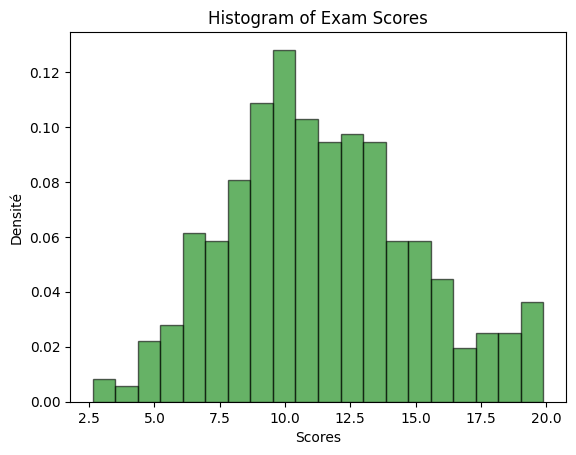

In [ ]:
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
plt.xlabel("Scores")
plt.ylabel("Densité")
plt.title("Histogram of Exam Scores")
plt.show()

L'histogramme montre une distribution en forme de cloche, indiquant que les données suivent probablement une distribution normale. Bien qu’il existe une légère asymétrie (skewness), les données semblent assez symétriques. L'étendue des données indique qu'elles ont une moyenne et une variance bien définies, qui sont des caractéristiques d'une distribution normale.

### Question 5 : Superposer la densité de la loi normale de moyenne "muEstim" et de variance "varEstim" à l'histogramme précédent. Commenter

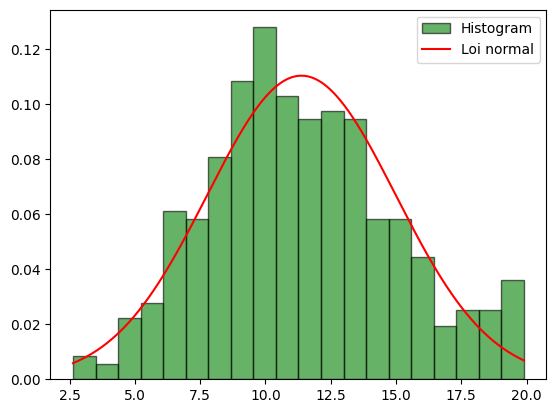

In [ ]:
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label="Histogram")
x_values = np.linspace(np.min(data), np.max(data), 1000)
densite = (1 / np.sqrt(2 * np.pi * varEstim)) * np.exp(-((x_values - muEstim) ** 2) / (2 * varEstim))
plt.plot(x_values, densite, 'r', label="Loi normal")
plt.legend()
plt.show()

La courbe normale suit globalement l’histogramme, mais des écarts sont visibles dans les queues.

### Question 6 : Créer une fonction "fR(x)" qui renvoie la valeur de la fonction de répartition d'une loi normale de moyenne "muEstim" et de variance "varEstim" en $x$. On pourra utiliser le calcul d'intégrale par la fonction "quad" de "scipy.integrate".

In [ ]:
#  calcul la valeur de la densité de probabilité pour une loi normale
def normal_dp(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
# Fonction de répartition d'une loi normale
def fR(x):
    resultat, _ = quad(normal_dp, -np.inf, x, args=(muEstim, np.sqrt(varEstim)))
    return resultat



On peut tester cette fonction en regardant différentes probabilités pour différentes valeurs seuil.



In [ ]:
print(fR(3),fR(9),fR(15),fR(19))


0.010175045745074784 0.255043798558326 0.8419313209412952 0.9825641902068163


Comme prévu on remarque que plus notre seuil est elevée, plus la probabilité est proche de 1.

### Question 7 : Représenter "fR" sur un intervalle de votre choix. Commenter l'intervalle choisi.

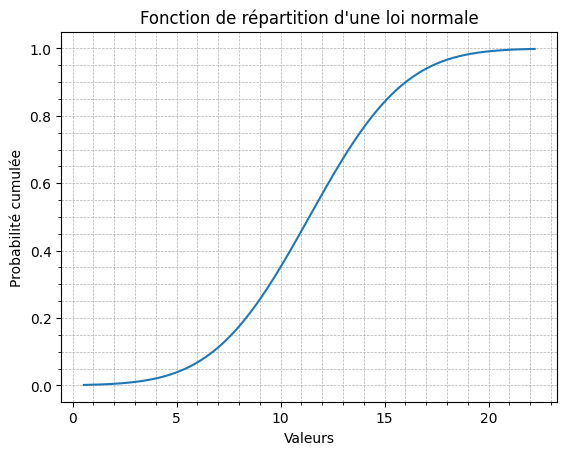

In [ ]:
x_range = np.linspace(muEstim - 3 * np.sqrt(varEstim), muEstim + 3 * np.sqrt(varEstim), 1000)
valeursloinormales = np.array([fR(x) for x in x_range])
sigmaEstim = np.sqrt(varEstim)
plt.plot(x_range, valeursloinormales)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel("Valeurs")
plt.ylabel("Probabilité cumulée")
plt.title("Fonction de répartition d'une loi normale")


plt.show()



Nous avons utilisé un intervalle de muEstim - 3 * np.sqrt(varEstim), muEstim + 3 * np.sqrt(varEstim) ce qui est plus adapté pour visualiser la majeure partie de la distribution normale.

### Question 8 : Créer les listes "effObs" et "effTh" qui contiennent respectivement les effectifs observés et théoriques. Vous pouvez pour ce faire, créer une fonction "effectif(X,nb_classes)" qui compte le nombre de valeurs de $X$ dans chaque classe (les classes allant de $0$ à $20$).

In [ ]:
# Pour compter le nombre de valeurs dans chaque classe
def effectif(X,nb_classes):
    bins = np.linspace(0, 20, nb_classes + 1)
    hist, _ = np.histogram(X, bins=bins)
    return hist

effObs = effectif (data, 20)
classes = [-np.inf, 1] + [i for i in range(2, 19)] + [19, np.inf]
effTh = len(data) * (np.diff([fR(b) for b in classes]))

print(f"Effectifs observés: {effObs}")
print(f"Effectifs théoriques: {effTh}")

Effectifs observés: [ 0  0  1  2  7 13 24 21 44 48 42 43 41 35 25 27  9  7 14 13]
Effectifs théoriques: [ 0.84427354  1.11359626  2.27494923  4.30660347  7.55471874 12.2806921
 18.49904423 25.82250092 33.40184171 40.03741626 44.47187958 45.77505866
 43.66126996 38.59115447 31.60843038 23.99062253 16.87341885 10.99732531
  6.64190692  7.25329687]


Nous avons donc nos effectifs observés qui sont ni plus ni moins que ce que nous avons concrètement sur notre liste. Par exemple on comprend que dans la classe [2,3[ nous avons une valeur et que dans la classe [3,4[ nous avons deux valeurs.
 Pour les effeectifs théoriques nous observons des valeurs différentes qui peuvent sembler étrange dans un premier temps. En effet dans les intervalles où nous n'avons pas de valeur par exemple [0,1[ nous avons un effectif théorique d'environ 1.11. C'est en réalité complement normal car l'effectif théorique suit une loi normale et donc nous n'avons pas 0 aux extrémités grâce à cette dernière.


### Question 9 : Créer une fonction "regroupeGauche(liste,k)" qui prend en entrée une liste et un entier positif $k$ et retourne la liste obtenue en regroupant et en sommant les $k$ premiers éléments de la liste.

In [ ]:
def regroupeGauche(liste,k):
    return [sum(liste[:k])] + liste[k:]



In [ ]:
regroupeGauche([2,4,3,6,3,7],4)

[15, 3, 7]

### Question 10 : Faire de même à droite en créant la fonction "regroupeDroite(liste,k)".

In [ ]:
def regroupeDroite(liste,k):
    return liste[:-k] + [sum(liste[-k:])]


In [ ]:
print(effObs)
regroupeDroite(effObs,4)

[ 0  0  1  2  7 13 24 21 44 48 42 43 41 35 25 27  9  7 14 13]


array([43, 43, 44, 45, 50, 56, 67, 64, 87, 91, 85, 86, 84, 78, 68, 70])

### Question 11 : En utilisant les fonctions précédentes, effectuer un regroupement de classes de sorte à ce que tous les effectifs théoriques soient plus grand que $5$. On nommera "effThBis" et "effObsBis" les nouveaux effectifs théoriques et observés.

In [ ]:
while min(effTh) < 5 :
    effTh = regroupeGauche(effTh, 2)
    effObs = regroupeGauche(effObs, 2)


effObsBis, effThBis = effObs, effTh
print("Effectifs observés après regroupement (effObsBis) :")
print(effObsBis)
print("Effectifs théoriques après regroupement (effThBis) :")
print(effThBis)

Effectifs observés après regroupement (effObsBis) :
[10 16 27 24 47 51 45 46 44 38 28 30 12 10 17 16]
Effectifs théoriques après regroupement (effThBis) :
[20.00988083 24.7358542  30.95420633 38.27766302 45.85700381 52.49257836
 56.92704168 58.23022076 56.11643206 51.04631656 44.06359247 36.44578463
 29.32858095 23.45248741 19.09706902 19.70845897]


Nous avons bien aucun effectif en dessous de 5 que ça soit théorique ou bien observé


### Question 12 : Calculer la distance de $\chi^2$ entre "effObsBis" et "effThBis".

In [ ]:
chi2dis = np.sum((np.array(effObsBis) - np.array(effThBis)) ** 2 / np.array(effThBis))
print(f"La distance du chi-deux est : {chi2dis}")

La distance du chi-deux est : 50.89142388833898


### Question 13 : Conclure quant à l'adéquation de "data" à une loi normale pour un risque de première espèce à $5\%$. On précisera le nombre de degrés de liberté du problème et on calculera la valeur critique de ce test (unilatéral gauche).

In [ ]:
from scipy.stats import chi2
df = len(effObsBis) - 1 - 2
alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, df) #on aurait pu également trouver cette valeur dans la table donné dans le cours

print(f"Chi-squared statistic: {chi2dis}")
print(f"Critical value at α = 5%: {chi2_critical}")

if chi2dis < chi2_critical:
    print("On ne rejette pas l'hypothèse d'adéquation à une loi normale.")
else:
    print("On rejette l'hypothèse d'adéquation à une loi normale.")

Chi-squared statistic: 50.89142388833898
Critical value at α = 5%: 22.362032494826934
On rejette l'hypothèse d'adéquation à une loi normale.


L'hypothèse est donc rejeté car notre valeur critique est plus faible que notre valeur.


### Prise en compte de l'asymétrie

### Question 14 : Définir une fonction "skewnorm(x,e,w,a)" qui donne la densité en $x$ d'une loi normale asymétrique de moyenne $e$, de variance $w$ et de coefficient d'asymétrie $a$ (compiler le code ci-dessous). Représenter cette densité avec par exemple $e=0, w=1$ et $a=4$.

In [ ]:
def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
def cdf(x):
    return (1 + erf(x/np.sqrt(2))) / 2

def skewnorm(x,m,s,a):
    t = (x-m) / s
    return 2 / s * pdf(t) * cdf(a*t)

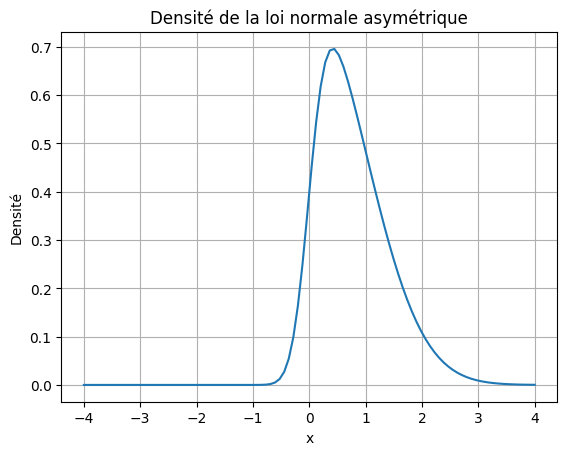

In [ ]:
e, w, a = 0, 1, 4
x = np.linspace(-4, 4, 100)
y = skewnorm(x, e, w, a)
plt.plot(x, y)
plt.title('Densité de la loi normale asymétrique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

Ce résultat est cohérent avec la préparation

### Question 15 : Créer une fonction "logvraissemblance(m,s,a)" qui donne la $\mathrm{log}$-vraissemblance de l'échantillon "data" pour le modèle de la loi normale asymétrique.

In [ ]:
def logvraissemblance(m,s,a):
    return np.sum(np.log(skewnorm(data, m, s, a)))


### Question 16 : Déterminer les estimations du maximum de vraissemblance "mEstim", "sEstim" et "aEstim" des paramètres "m,s,a" (compiler le code de la cellule qui suit pour ce faire). Supperposer la densité de cette loi normale asymétrique à l'histogramme de "data".

In [ ]:
mtest=np.arange(5,15,0.1) #le pas est très important ici car la compléxité est très grande
stest=np.arange(1,8,0.1)  #Si vous tester 0.01, cela va prendre du temps !!
atest=np.arange(0,3,0.1)

Res=[]
MSA=[]
for i in range(len(mtest)):
    for j in range(len(stest)):
        for k in range(len(atest)):
            Res.append(logvraissemblance(mtest[i],stest[j],atest[k]))
            MSA.append([mtest[i],stest[j],atest[k]])

Max=max(Res)
Argmax=np.argmax(Res)
[mEstim,sEstim,aEstim]=MSA[Argmax]

print("mEstim=",mEstim)
print("sEstim=",sEstim)
print("aEstim=",aEstim)


<ipython-input-56-0a972ec0f6fa>:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(skewnorm(data, m, s, a)))


mEstim= 7.79999999999999
sEstim= 5.100000000000003
aEstim= 1.9000000000000001


### Question 17 : Superposer l'histogramme de la question $4$ avec celui de la densité de la loi normale asymétrique de paramètres "mEstim, sEstim, aEstim". Commenter.

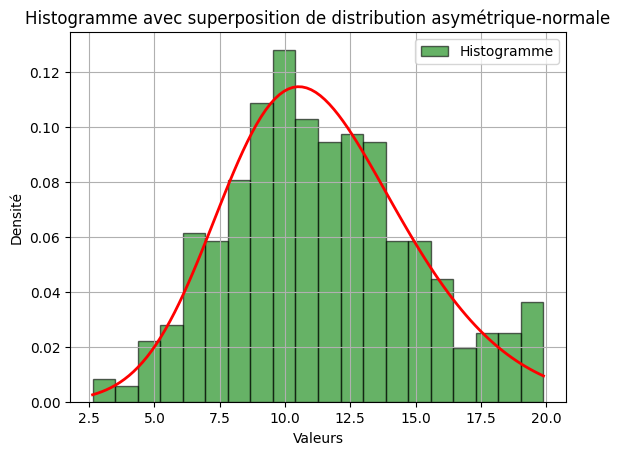

In [ ]:
x = np.linspace(min(data), max(data), 100)

skew_pdf = skewnorm(x, mEstim, sEstim, aEstim)

plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label="Histogramme")

plt.plot(x, skew_pdf, 'r-', linewidth=2)

plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.title("Histogramme avec superposition de distribution asymétrique-normale")
plt.legend()
plt.grid()
plt.show()

On remarque une légère amélioration à la fin du graphique, car la densité de la loi normale asymétrique, adaptée aux paramètres estimés, suit mieux la forme des données, notamment leur asymétrie.


### Question 18 : Effectuer le test du $\chi^2$ d'adéquation de "data" à une loi normale asymétrique et conclure.

In [ ]:
from scipy.stats import chisquare, skewnorm

def effectif(X, nb_classes):

    bins = np.linspace(min(X), max(X), nb_classes + 1)
    hist, _ = np.histogram(X, bins=bins)
    return hist.tolist()

num_bins = 20
effObs = effectif(data, num_bins)

bin_edges = np.linspace(min(data), max(data), num_bins + 1)

effTh = [len(data) * (skewnorm.cdf(bin_edges[i+1], aEstim, loc=mEstim, scale=sEstim) -
                      skewnorm.cdf(bin_edges[i], aEstim, loc=mEstim, scale=sEstim)) for i in range(num_bins)]

effTh = np.array(effTh) * (sum(effObs) / sum(effTh))

chi2_stat, p = chisquare(effObs, f_exp=effTh)

print("Chi-Square Statistic (χ²):", chi2_stat)
print("p:", p)

alpha = 0.05
if p < alpha:
    print("Conclusion: Les données ne suivent pas une loi normale asymétrique.")
else:
    print("Conclusion:Les données suivent une loi normale asymétrique")

Chi-Square Statistic (χ²): 29.4122269765174
p: 0.05977154299608803
Conclusion:Les données suivent une loi normale asymétrique


### Indépendance de deux caractères

In [ ]:
dataFemmes=[19.9,18.22,17.63,17.63,16.32,15.66,15.66,15.66,15.39,15.39,15.26,15,14.87,
            14.61,14.08,13.68,13.42,13.42,13.29,13.16,12.89,12.89,12.76,12.76,12.76,
            12.37,12.24,12.24,12.24,12.24,11.84,11.05,10.66,10.39,10.39,10.26,10,9.61,
            9.08,7.5,6.84]
dataHommes=[19.9,19.9,19.14,18.55,18.55,
            18.42,18.29,18.16,17.83,17.37,17.24,16.84,16.18,16.18,16.18,16.05,15.92,
            15.92,15.79,15.79,15.66,15.66,15.53,15.53,15.39,15.39,15.13,15.13,15,15,
            15,14.93,14.74,14.74,14.61,14.61,14.61,14.34,14.21,14.21,14.08,14.08,14.08,
            14.08,13.95,13.82,13.82,13.82,13.62,13.55,13.42,13.16,13.16,12.89,12.89,
            12.89,12.89,12.76,12.63,12.5,12.5,12.5,12.5,12.43,12.37,12.37,12.24,12.24,
            12.11,12.11,12.11,12.11,11.97,11.97,11.84,11.84,11.84,11.84,11.58,11.58,
            11.58,11.58,11.58,11.45,11.45,11.25,11.25,11.25,11.18,11.18,11.05,10.92,
            10.92,10.83,10.79,10.79,10.66,10.66,10.66,10.53,10.53,10.53,10.53,10.53,
            10.39,10.26,10.26,10.26,10.26,10.13,10.13,10,10,10,10,10,9.87,9.84,9.74,
            9.74,9.74,9.74,9.67,9.61,9.61,9.41,9.34,9.34,9.34,9.28,9.21,9.21,8.95,8.95,
            8.82,8.82,8.82,8.68,8.55,8.42,8.29,8.29,8.16,8.03,7.89,7.89,7.63,7.63,7.43,
            7.24,7.11,6.97,6.97,6.84,6.84,6.84,6.71,6.71,6.58,6.45,6.32,6.18,5.66,
            5.39,5.39,5.26,5.26,5.13,4.61,4.61,4.47,2.63,11.45,13.16,11.05]

### Question 19 : Créer la matrice de contingence des fréquences observées et celle des fréquences théoriques sous l'hypothèse d'indépendance. Les classes seront les suivantes. \begin{align*}
[0,10.5[;[10.5,13[;[13,15[;[15,16[,[16,20].\end{align*}
### Calculer la distance du $\chi^2$ de ce test d'indépendance, puis conclure (test unilatéral gauche) en précisant la valeur critique et le nombre de degrés de liberté au seuil de risque de première espèce de $5\%$.

In [ ]:
bin_edges = [0, 10.5, 13, 15, 16, 20]

Effectif_femmes, _ = np.histogram(dataFemmes, bins=bin_edges)
Effectif_hommes, _ = np.histogram(dataHommes, bins=bin_edges)

contingency_table = np.array([Effectif_femmes, Effectif_hommes])

chi2_stat, p, dof, expected_frequencies = chi2_contingency(contingency_table)

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)


print("Table de contingence (Fréquences observées) :")
print(contingency_table)

print("\nFréquences attendues sous l'hypothèse d'indépendance :")
print(expected_frequencies)

print("\nStatistique du Chi-Deux (χ²) :", chi2_stat)
print("Degrés de liberté :", dof)
print("Valeur critique à α=0.05 :", critical_value)
print("p-valeur :", p)

if chi2_stat > critical_value:
    print("Conclusion : Rejet de H0. Il existe une association significative entre le genre et les résultats.")
else:
    print("Conclusion : Non-rejet de H0. Aucune association significative entre le genre et les résultats.il y'a independance")



Table de contingence (Fréquences observées) :
[[ 8 13  8  7  5]
 [68 53 23 15 16]]

Fréquences attendues sous l'hypothèse d'indépendance :
[[14.42592593 12.52777778  5.88425926  4.17592593  3.98611111]
 [61.57407407 53.47222222 25.11574074 17.82407407 17.01388889]]

Statistique du Chi-Deux (χ²) : 7.169541121136395
Degrés de liberté : 4
Valeur critique à α=0.05 : 9.487729036781154
p-valeur : 0.12719543750034035
Conclusion : Non-rejet de H0. Aucune association significative entre le genre et les résultats.il y'a independance
